# Central limit theorem (CLT)

In this talk we will discuss probability density functions and some theorems like central limit theorem, etc. 
Lets begin by looking at the distributions of random numbers. In the first case we bin uniformly distributed 
random numbers while in the second case we have binned Gaussian distribution of random numbers.

In [1]:
# import stuff
from __future__ import division      
import numpy as np
import scipy.stats as stats     # for pdfs 
import matplotlib.pyplot as plt

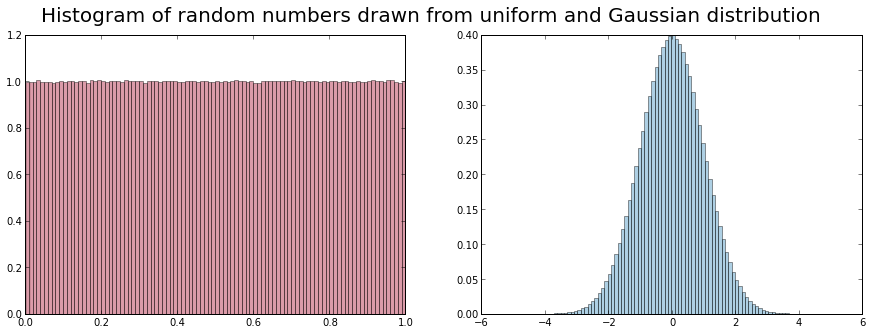

In [6]:
# hist a set of random numbers, Gaussian distributed
import numpy as np
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

N = 10000000
x = np.random.random(N)
ax1.hist(x, 100, normed=True, color='#A60628', alpha=0.4);

x = np.random.randn(N)
ax2.hist(x ,100, normed=True, color='#348ABD', alpha=0.4);

suptitle("Histogram of random numbers drawn from uniform and Gaussian distribution",fontsize=20);

## Samples
To know about a population we take recourse to sampling.


* Samples are group of observation drwan from a bigger population.
* All this effort is to know about a bigger population based on sample.

### Gaussian distribution
$P(x;\mu,\sigma)=\displaystyle \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\displaystyle \left( -\frac{(x-\mu)^2}{2 \sigma^2} \right) },
\hspace{1in} x \in [-\infty;\infty]$

#### mean=$\mu$, variance=$\sigma^2$
#### We will see that this distribution plays a central role in the central limit theorem!

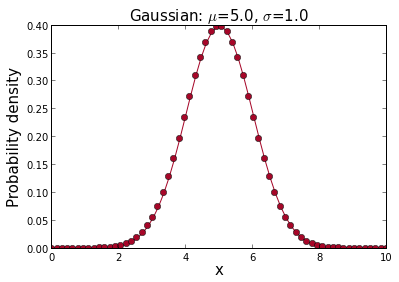

In [7]:
u = 5 # mean
s = 1 # standard deviation
x = np.linspace(0,10, 64)
y = (1/(np.sqrt(2*np.pi*s*s)))*np.exp(-(((x-u)**2)/(2*s*s)))

plot(x,y,'o-', color='#A60628')
title('Gaussian: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
xlabel('x',fontsize=15)
ylabel('Probability density',fontsize=15)

### Binomial distribution
$$
P(n;N,p)=\displaystyle \left(
\frac{N!}{n!(N-n)!}
\right)
p^n (1-p)^{N-n}
$$

#### mean=$Np$, variance=$Np(1-p)$


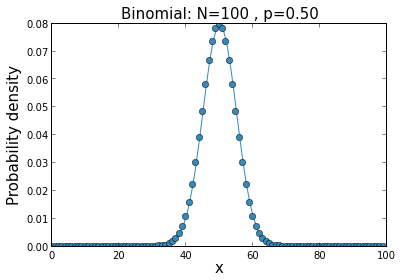

In [8]:
N = 100
p = 0.5
n = np.arange(0, 100)
y = stats.binom.pmf(n, N, p)


plot(n,y,'o-', color='#348ABD')
title('Binomial: N=%i , p=%.2f' % (N,p),fontsize=15)
xlabel('x',fontsize=15)
ylabel('Probability density',fontsize=15)

### Poisson distribution
$$
P(n;\mu)=\frac{\mu^n e^{-\mu}}{n!}
$$

#### mean=$\mu$, variance=$\mu$


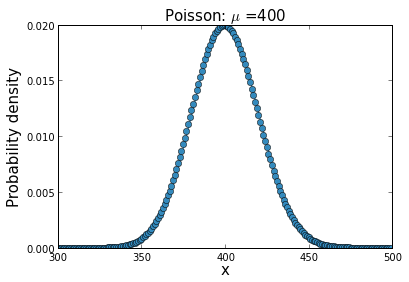

In [9]:
u=400
n=range(300, 500)
y=stats.poisson.pmf(n,u)

plot(n,y,'o-', color='#348ABD')
title('Poisson: $\mu$ =%i' % u,fontsize=15)
xlabel('x',fontsize=15)
ylabel('Probability density',fontsize=15)

## Central limit theorem

Let  $\{X_n\}$ be a sequence of random variables. A sequence of independent and identically distributed (iid) random variables.
> Central Limit Theorem (CLT) says that the sum of iid random variables approaches a Gaussian distribution, as the sample size increases.
$$ $$
As $n$ gets bigger the distribution of the sample mean will always converge to a Gaussian (normal) distribution with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.



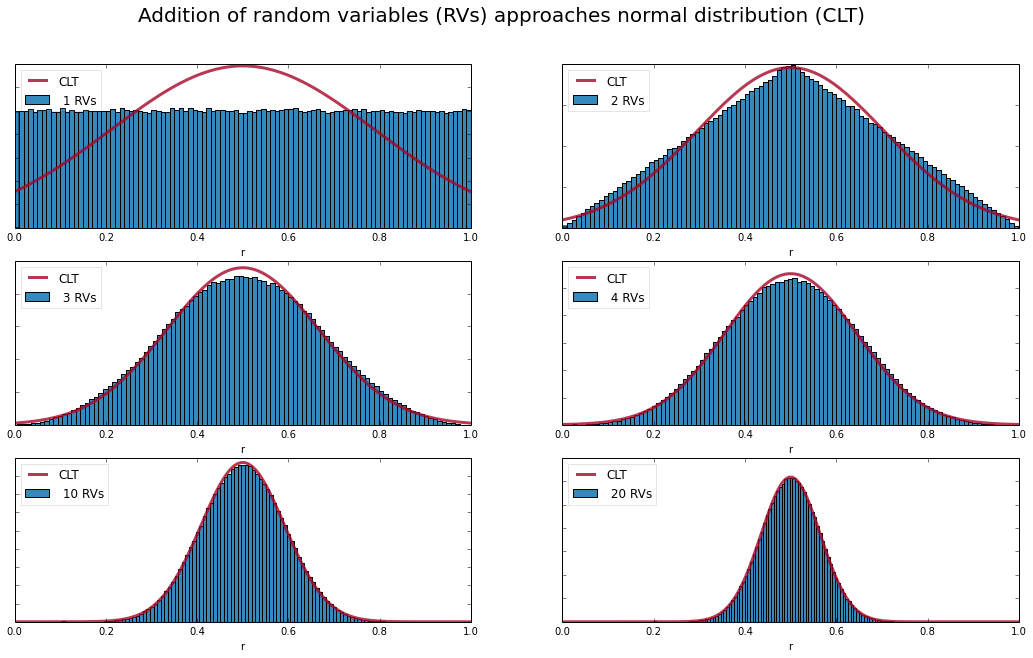

In [3]:
f = plt.figure(figsize=(18, 10))
 
def plotHist(nr, N, n_):
    ''' plots the RVs'''
    x = np.zeros((N))
    sp = f.add_subplot(3, 2, n_ )
    
    for i in range(N):    
        for j in range(nr):
            x[i] += np.random.random() 
        x[i] *= 1/nr
    hist(x, 100, normed=True, color='#348ABD', label=" %d RVs"%(nr));
    setp(sp.get_yticklabels(), visible=False)
    x = np.linspace(0, 1, 128)
    mean = 0.5
    variance = (1/(12*nr))                     
    fac = 1/np.sqrt(2*np.pi*variance)
    dist = fac*np.exp(-(x-mean)**2/(2*variance))
    plot(x,dist,color='#A60628',linewidth=3,label='CLT',alpha=0.8)
    xlabel('r')
    xlim([0, 1])
    leg = legend(loc="upper left")
    leg.get_frame().set_alpha(0.1)

N = 1000000   # number of samples taken
numbFrames= 6   
nr = ([1, 2, 3, 4,  10, 20])
for i in range(numbFrames):
    plotHist(nr[i], N, i+1)

suptitle("Addition of random variables (RVs) approaches normal distribution (CLT)",fontsize=20);

### The talk can be accesed [here](http://www.imsc.res.in/~rsingh/discussion/cond-mat/files/slides/clt.pdf)


In [2]:
from IPython.display import HTML
HTML('<iframe src=https://www.imsc.res.in/~rsingh/discussion/files/slides/clt.pdf width=540 height=380></iframe>')